In [3]:
import pybaseball as pyball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
year = 2023
astros = pyball.schedule_and_record(year, 'HOU')
athletics = pyball.schedule_and_record(year, 'OAK')
angels = pyball.schedule_and_record(year, 'LAA')
rangers = pyball.schedule_and_record(year, 'TEX')
mariners = pyball.schedule_and_record(year, 'SEA')

http://www.baseball-reference.com/teams/HOU/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/LAA/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/TEX/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/SEA/2023-schedule-scores.shtml


In [5]:
astros.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.104938,4.308642,9.092593,2.117284,33231.728395,0.407407
std,3.617775,2.972512,0.483332,0.624408,9896.651793,2.177113
min,0.000000,0.000000,9.000000,1.000000,4757.000000,-5.000000
25%,2.000000,2.000000,9.000000,2.000000,29405.750000,-1.000000
50%,5.000000,4.000000,9.000000,2.000000,36863.000000,1.000000
75%,7.000000,6.000000,9.000000,2.000000,40323.750000,2.000000
max,17.000000,17.000000,14.000000,4.000000,49795.000000,8.000000


Collecte some preliminary data for the AL west teams and checking that with the .describe function.

In [7]:
athletics.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,3.611111,5.703704,9.111111,4.932099,18493.944444,-1.697531
std,2.923985,3.413326,0.417029,0.403810,12054.541443,3.052521
min,0.000000,0.000000,9.000000,1.000000,2064.000000,-11.000000
25%,2.000000,3.000000,9.000000,5.000000,8842.250000,-3.000000
50%,3.000000,5.000000,9.000000,5.000000,14887.500000,-2.000000
75%,5.000000,7.750000,9.000000,5.000000,28527.000000,1.000000
max,12.000000,18.000000,12.000000,5.000000,52624.000000,7.000000


In [8]:
angels.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,161.000000,162.000000
mean,4.561728,5.117284,9.111111,3.111111,32004.776398,-0.388889
std,3.245525,3.488020,0.386094,0.863332,8660.712670,2.383301
min,0.000000,0.000000,9.000000,1.000000,12073.000000,-7.000000
25%,2.000000,3.000000,9.000000,3.000000,26134.000000,-2.000000
50%,4.000000,5.000000,9.000000,3.000000,32582.000000,-1.000000
75%,6.000000,7.000000,9.000000,4.000000,38341.000000,1.000000
max,25.000000,18.000000,12.000000,4.000000,53057.000000,5.000000


In [9]:
rangers.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.438272,4.419753,9.098765,1.197531,28597.308642,0.450617
std,3.875294,3.346878,0.462371,0.520863,10011.673368,2.665754
min,0.000000,0.000000,9.000000,1.000000,2949.000000,-8.000000
25%,2.250000,2.000000,9.000000,1.000000,21951.750000,-1.000000
50%,5.000000,4.000000,9.000000,1.000000,29377.500000,1.000000
75%,7.000000,6.750000,9.000000,1.000000,36475.500000,2.000000
max,18.000000,16.000000,13.000000,3.000000,46064.000000,8.000000


In [10]:
mariners.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.679012,4.067901,9.166667,3.320988,30732.660494,0.413580
std,2.941784,3.207380,0.489010,0.896192,10830.573198,2.417958
min,0.000000,0.000000,9.000000,1.000000,2583.000000,-4.000000
25%,3.000000,2.000000,9.000000,3.000000,22745.500000,-1.000000
50%,4.000000,3.000000,9.000000,3.000000,32914.000000,1.000000
75%,6.000000,6.000000,9.000000,4.000000,39417.000000,2.000000
max,15.000000,16.000000,12.000000,5.000000,45823.000000,8.000000


Now, we want to pull out some more specific information, specifically here we will grab each team's wins, losses, and win % for the 2023 season and store it in our dataframes for each team.

In [11]:
astros['Wins'] = np.where(astros['W/L'] == 'W', 1,
                          (np.where(astros['W/L'] == 'W-wo', 1, 0))).cumsum()
astros['Losses'] = np.where(astros['W/L'] == 'L', 1,
                          (np.where(astros['W/L'] == 'L-wo', 1, 0))).cumsum()
astros['Win_Percentage'] = astros['Wins'] / (astros['Wins'] + astros['Losses'])

In [14]:
astros.describe()

,R,RA,Inn,Rank,Attendance,Streak,Wins,Losses,Win_Percentage
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.104938,4.308642,9.092593,2.117284,33231.728395,0.407407,45.425926,36.074074,0.540803
std,3.617775,2.972512,0.483332,0.624408,9896.651793,2.177113,26.549802,20.416640,0.063572
min,0.000000,0.000000,9.000000,1.000000,4757.000000,-5.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,9.000000,2.000000,29405.750000,-1.000000,22.250000,19.000000,0.538715
50%,5.000000,4.000000,9.000000,2.000000,36863.000000,1.000000,44.500000,37.000000,0.557095
75%,7.000000,6.000000,9.000000,2.000000,40323.750000,2.000000,69.750000,52.000000,0.566864
max,17.000000,17.000000,14.000000,4.000000,49795.000000,8.000000,90.000000,72.000000,0.666667


In [15]:
athletics['Wins'] = np.where(athletics['W/L'] == 'W', 1,
                          (np.where(athletics['W/L'] == 'W-wo', 1, 0))).cumsum()
athletics['Losses'] = np.where(athletics['W/L'] == 'L', 1,
                          (np.where(athletics['W/L'] == 'L-wo', 1, 0))).cumsum()
athletics['Win_Percentage'] = athletics['Wins'] / (athletics['Wins'] + athletics['Losses'])

In [16]:
athletics.describe()

,R,RA,Inn,Rank,Attendance,Streak,Wins,Losses,Win_Percentage
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,3.611111,5.703704,9.111111,4.932099,18493.944444,-1.697531,22.327160,59.172840,0.261722
std,2.923985,3.413326,0.417029,0.403810,12054.541443,3.052521,15.090958,31.978755,0.075459
min,0.000000,0.000000,9.000000,1.000000,2064.000000,-11.000000,1.000000,0.000000,0.157895
25%,2.000000,3.000000,9.000000,5.000000,8842.250000,-3.000000,9.000000,32.250000,0.214286
50%,3.000000,5.000000,9.000000,5.000000,14887.500000,-2.000000,21.000000,60.500000,0.268429
75%,5.000000,7.750000,9.000000,5.000000,28527.000000,1.000000,34.000000,87.750000,0.286646
max,12.000000,18.000000,12.000000,5.000000,52624.000000,7.000000,50.000000,112.000000,1.000000


In [23]:
angels['Wins'] = np.where(angels['W/L'] == 'W', 1,
                          (np.where(angels['W/L'] == 'W-wo', 1, 0))).cumsum()
angels['Losses'] = np.where(angels['W/L'] == 'L', 1,
                          (np.where(angels['W/L'] == 'L-wo', 1, 0))).cumsum()
angels['Win_Percentage'] = angels['Wins'] / (angels['Wins'] + angels['Losses'])

In [24]:
angels.describe()

,R,RA,Inn,Rank,Attendance,Streak,Wins,Losses,Win_Percentage
count,162.000000,162.000000,162.000000,162.000000,161.000000,162.000000,162.000000,162.000000,162.000000
mean,4.561728,5.117284,9.111111,3.111111,32004.776398,-0.388889,40.259259,41.240741,0.507403
std,3.245525,3.488020,0.386094,0.863332,8660.712670,2.383301,21.461957,25.674456,0.058271
min,0.000000,0.000000,9.000000,1.000000,12073.000000,-7.000000,0.000000,1.000000,0.000000
25%,2.000000,3.000000,9.000000,3.000000,26134.000000,-2.000000,21.250000,20.000000,0.484249
50%,4.000000,5.000000,9.000000,3.000000,32582.000000,-1.000000,44.000000,37.500000,0.509545
75%,6.000000,7.000000,9.000000,4.000000,38341.000000,1.000000,59.750000,62.000000,0.531091
max,25.000000,18.000000,12.000000,4.000000,53057.000000,5.000000,73.000000,89.000000,0.750000


In [25]:
rangers['Wins'] = np.where(rangers['W/L'] == 'W', 1,
                          (np.where(rangers['W/L'] == 'W-wo', 1, 0))).cumsum()
rangers['Losses'] = np.where(rangers['W/L'] == 'L', 1,
                          (np.where(rangers['W/L'] == 'L-wo', 1, 0))).cumsum()
rangers['Win_Percentage'] = rangers['Wins'] / (rangers['Wins'] + rangers['Losses'])

In [26]:
rangers.describe()

,R,RA,Inn,Rank,Attendance,Streak,Wins,Losses,Win_Percentage
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.438272,4.419753,9.098765,1.197531,28597.308642,0.450617,47.598765,33.901235,0.603658
std,3.875294,3.346878,0.462371,0.520863,10011.673368,2.665754,25.828738,21.229655,0.064405
min,0.000000,0.000000,9.000000,1.000000,2949.000000,-8.000000,1.000000,0.000000,0.500000
25%,2.250000,2.000000,9.000000,1.000000,21951.750000,-1.000000,25.250000,16.000000,0.570427
50%,5.000000,4.000000,9.000000,1.000000,29377.500000,1.000000,49.000000,32.500000,0.593750
75%,7.000000,6.750000,9.000000,1.000000,36475.500000,2.000000,72.000000,49.750000,0.620447
max,18.000000,16.000000,13.000000,3.000000,46064.000000,8.000000,90.000000,72.000000,1.000000


In [27]:
mariners['Wins'] = np.where(mariners['W/L'] == 'W', 1,
                          (np.where(mariners['W/L'] == 'W-wo', 1, 0))).cumsum()
mariners['Losses'] = np.where(mariners['W/L'] == 'L', 1,
                          (np.where(mariners['W/L'] == 'L-wo', 1, 0))).cumsum()
mariners['Win_Percentage'] = mariners['Wins'] / (mariners['Wins'] + mariners['Losses'])

In [28]:
mariners.describe()

,R,RA,Inn,Rank,Attendance,Streak,Wins,Losses,Win_Percentage
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.679012,4.067901,9.166667,3.320988,30732.660494,0.413580,42.833333,38.666667,0.503026
std,2.941784,3.207380,0.489010,0.896192,10830.573198,2.417958,26.585909,20.480865,0.070400
min,0.000000,0.000000,9.000000,1.000000,2583.000000,-4.000000,1.000000,0.000000,0.200000
25%,3.000000,2.000000,9.000000,3.000000,22745.500000,-1.000000,21.000000,20.250000,0.486926
50%,4.000000,3.000000,9.000000,3.000000,32914.000000,1.000000,39.500000,42.000000,0.500000
75%,6.000000,6.000000,9.000000,4.000000,39417.000000,2.000000,66.750000,55.000000,0.541868
max,15.000000,16.000000,12.000000,5.000000,45823.000000,8.000000,88.000000,74.000000,1.000000


Graphing Wins

Text(0.5, 1.0, 'AL West Wins chart for 2023')

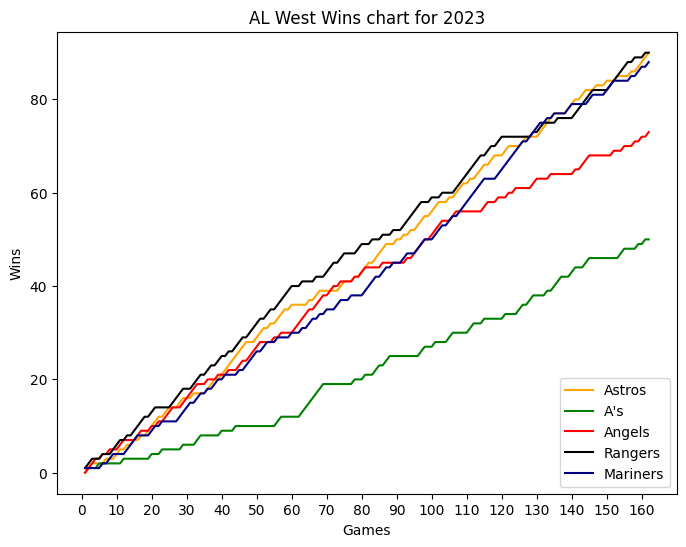

In [31]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(astros['Wins'], label="Astros", c="orange")
plt.plot(athletics['Wins'], label="A's", c="green")
plt.plot(angels['Wins'], label="Angels", c="red")
plt.plot(rangers['Wins'], label="Rangers", c="black")
plt.plot(mariners['Wins'], label="Mariners", c="navy")

plt.xticks(np.arange(0, len(astros.index), step=10))
plt.xlabel('Games')
plt.ylabel('Wins')

plt.legend(loc='lower right')
plt.title(f"AL West Wins chart for {year}")

Win % Chart

Text(0.5, 1.0, 'AL West Win % chart for 2023')

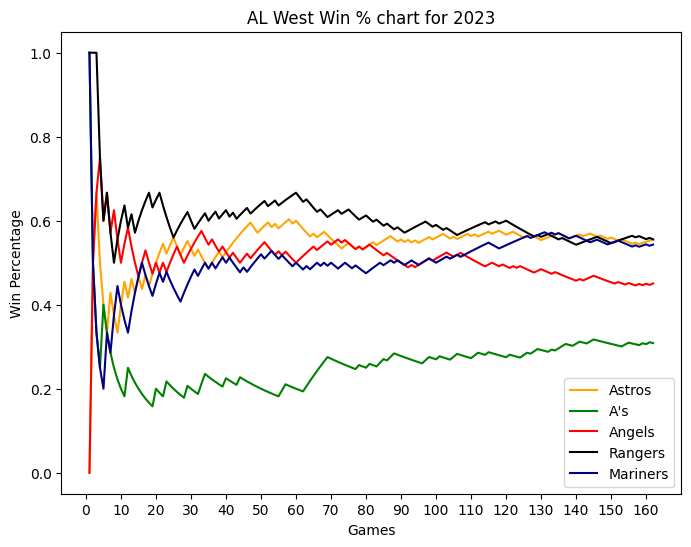

In [33]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(astros['Win_Percentage'], label="Astros", c="orange")
plt.plot(athletics['Win_Percentage'], label="A's", c="green")
plt.plot(angels['Win_Percentage'], label="Angels", c="red")
plt.plot(rangers['Win_Percentage'], label="Rangers", c="black")
plt.plot(mariners['Win_Percentage'], label="Mariners", c="navy")

plt.xticks(np.arange(0, len(astros.index), step=10))
plt.xlabel('Games')
plt.ylabel('Win Percentage')

plt.legend(loc='lower right')
plt.title(f"AL West Win % chart for {year}")

Games Back

In [54]:
def games_behind(gb):
    if gb=="Tied":
        gb=0.0
    elif 'up' in gb:
        gb=0.0
    else:
        gb = -float(gb)
    return (gb)

astros['int_GB'] = astros['GB'].dropna().apply(games_behind)
athletics['int_GB'] = athletics['GB'].dropna().apply(games_behind)
angels['int_GB'] = angels['GB'].dropna().apply(games_behind)
rangers['int_GB'] = rangers['GB'].dropna().apply(games_behind)
mariners['int_GB'] = mariners['GB'].dropna().apply(games_behind)

Text(0.5, 1.0, 'AL West Games Back chart for 2023')

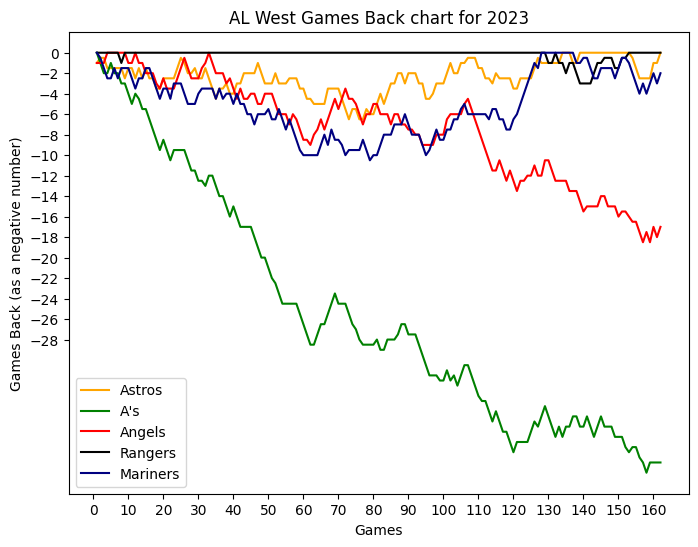

In [55]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot((astros['int_GB']), label="Astros", c="orange")
plt.plot((athletics['int_GB']), label="A's", c="green")
plt.plot((angels['int_GB']), label="Angels", c="red")
plt.plot((rangers['int_GB']), label="Rangers", c="black")
plt.plot((mariners['int_GB']), label="Mariners", c="navy")

plt.xticks(np.arange(0, len(astros.index), step=10))
plt.yticks(np.arange(0, -30, step=-2))
plt.xlabel('Games')
plt.ylabel('Games Back (as a negative number)')

plt.legend(loc='lower left')
plt.title(f"AL West Games Back chart for {year}")

Runs Scored and Runs Allowed

In [56]:
astros['Runs'] = astros['R'].cumsum()
astros['Runs_Allowed'] = astros['RA'].cumsum()

athletics['Runs'] = athletics['R'].cumsum()
athletics['Runs_Allowed'] = athletics['RA'].cumsum()

angels['Runs'] = angels['R'].cumsum()
angels['Runs_Allowed'] = angels['RA'].cumsum()

rangers['Runs'] = rangers['R'].cumsum()
rangers['Runs_Allowed'] = rangers['RA'].cumsum()

mariners['Runs'] = mariners['R'].cumsum()
mariners['Runs_Allowed'] = mariners['RA'].cumsum()

Text(0.5, 1.0, 'AL West Games Runs Allowed chart for 2023')

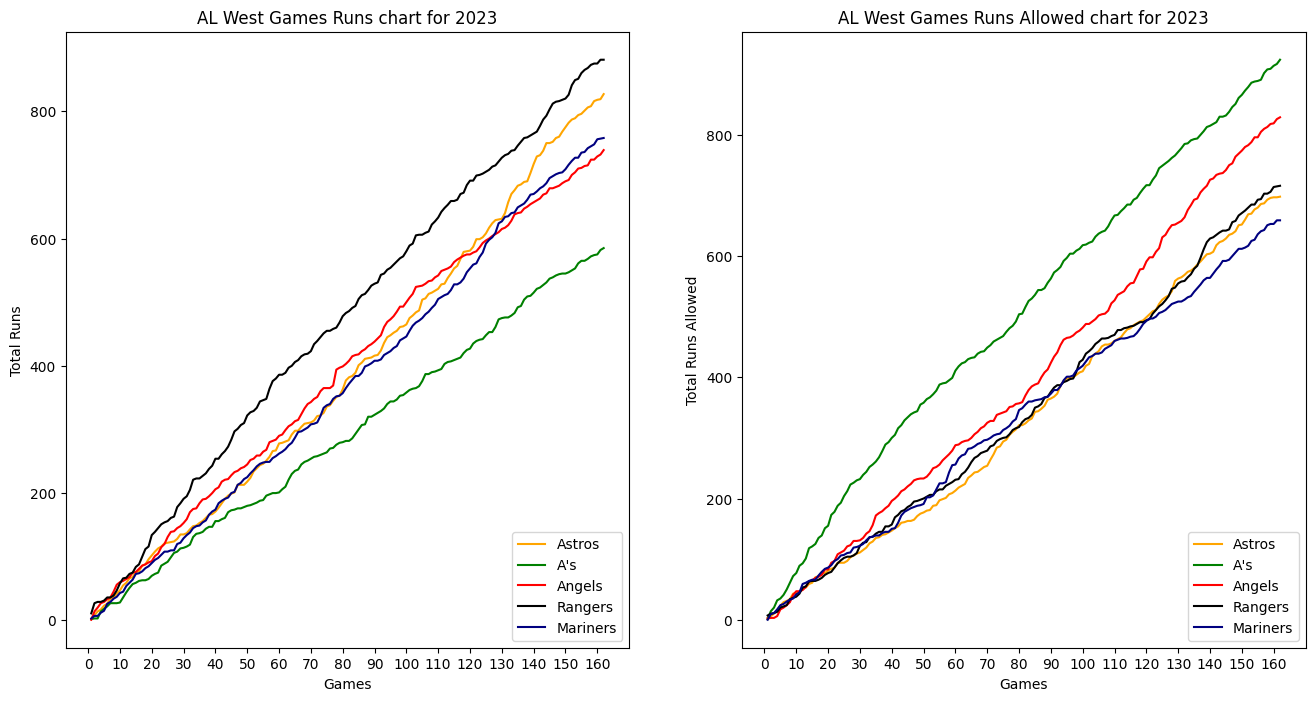

In [58]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
plt.plot((astros['Runs']), label="Astros", c="orange")
plt.plot((athletics['Runs']), label="A's", c="green")
plt.plot((angels['Runs']), label="Angels", c="red")
plt.plot((rangers['Runs']), label="Rangers", c="black")
plt.plot((mariners['Runs']), label="Mariners", c="navy")

plt.xticks(np.arange(0, len(astros.index), step=10))
plt.xlabel('Games')
plt.ylabel('Total Runs')

plt.legend(loc='lower right')
plt.title(f"AL West Games Runs chart for {year}")

plt.subplot(1,2,2)
plt.plot((astros['Runs_Allowed']), label="Astros", c="orange")
plt.plot((athletics['Runs_Allowed']), label="A's", c="green")
plt.plot((angels['Runs_Allowed']), label="Angels", c="red")
plt.plot((rangers['Runs_Allowed']), label="Rangers", c="black")
plt.plot((mariners['Runs_Allowed']), label="Mariners", c="navy")

plt.xticks(np.arange(0, len(astros.index), step=10))
plt.xlabel('Games')
plt.ylabel('Total Runs Allowed')

plt.legend(loc='lower right')
plt.title(f"AL West Games Runs Allowed chart for {year}")